In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import plot_model #for model visualization

In [2]:
with_mask_data = os.listdir(r'/content/sample_data/Data/masked')

In [3]:
print(with_mask_data[0:5])

['with_mask_5.jpg', 'with_mask_13.jpg', 'with_mask_18.jpg', '.ipynb_checkpoints', 'with_mask_3.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_data))

Number of with mask images: 19


In [5]:
without_mask_data = os.listdir(r'/content/sample_data/Data/unmasked')

In [6]:
print(without_mask_data[0:5])

['without_mask_3.jpg', 'without_mask_9.jpg', 'without_mask_6.jpg', 'without_mask_14.jpg', 'without_mask_10.jpg']


In [7]:
print('Number of without mask images:', len(without_mask_data))


Number of without mask images: 15


In [8]:
with_mask_labels = [1]*len(with_mask_data)
print(f"With Mask labels" ,with_mask_labels[0:10])

without_mask_labels = [0]*len(without_mask_data)
print(f"Without Mask Labels", without_mask_labels[0:10])


With Mask labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Without Mask Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
Labels = with_mask_labels + without_mask_labels
print(f"Labels", Labels[0:10])
print(f"Labels", Labels[-10:])

Labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
def load_images_from_folder(folder):
    images = []  # Initialize the list to store image arrays
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        # Check if it's a file and if it has a valid image extension
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            print(f"Loading image: {filename}")  # Print the filename for debugging
            img = Image.open(file_path)
            img = img.resize((128, 128))  # Resize the image to 128x128
            img = img.convert('RGB')  # Convert the image to RGB
            images.append(np.array(img))  # Convert to numpy array and append to the list
    return images

with_mask_images = load_images_from_folder(r'/content/sample_data/Data/masked')
without_mask_images = load_images_from_folder(r'/content/sample_data/Data/unmasked')

Loading image: with_mask_5.jpg
Loading image: with_mask_13.jpg
Loading image: with_mask_18.jpg
Loading image: with_mask_3.jpg
Loading image: with_mask_1.jpg
Loading image: with_mask_15.jpg
Loading image: with_mask_8.jpg
Loading image: with_mask_10.jpg
Loading image: with_mask_17.jpg
Loading image: with_mask_11.jpg
Loading image: with_mask_2.jpg
Loading image: with_mask_14.jpg
Loading image: with_mask_12.jpg
Loading image: with_mask_16.jpg
Loading image: with_mask_9.jpg
Loading image: with_mask_6.jpg
Loading image: with_mask_4.jpg
Loading image: with_mask_7.jpg
Loading image: without_mask_3.jpg
Loading image: without_mask_9.jpg
Loading image: without_mask_6.jpg
Loading image: without_mask_14.jpg
Loading image: without_mask_10.jpg
Loading image: without_mask_1.jpg
Loading image: without_mask_4.jpg
Loading image: without_mask_12.jpg
Loading image: without_mask_16.jpg
Loading image: without_mask_11.jpg
Loading image: without_mask_8.jpg
Loading image: without_mask_2.jpg
Loading image: witho

array([[[75, 76, 78],
        [67, 68, 70],
        [61, 62, 64],
        ...,
        [42, 47, 47],
        [46, 50, 51],
        [52, 56, 57]],

       [[78, 80, 82],
        [77, 79, 80],
        [69, 71, 73],
        ...,
        [55, 59, 60],
        [55, 59, 60],
        [59, 63, 64]],

       [[89, 93, 94],
        [71, 75, 76],
        [53, 57, 58],
        ...,
        [55, 60, 60],
        [64, 68, 69],
        [71, 75, 76]],

       ...,

       [[82, 87, 87],
        [81, 86, 86],
        [65, 69, 69],
        ...,
        [34, 34, 42],
        [39, 39, 47],
        [31, 31, 39]],

       [[74, 77, 79],
        [70, 74, 75],
        [58, 62, 63],
        ...,
        [34, 34, 42],
        [39, 39, 47],
        [31, 31, 39]],

       [[75, 79, 80],
        [66, 70, 71],
        [55, 59, 60],
        ...,
        [32, 32, 40],
        [35, 35, 43],
        [32, 32, 40]]], dtype=uint8)
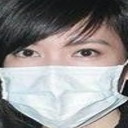

In [15]:
images[0]

In [17]:
len(images)

3

In [19]:
images[0].shape

(128, 128, 3)

In [20]:
X = np.array(images)
Y = np.array(Labels)

array([[[75, 76, 78],
        [67, 68, 70],
        [61, 62, 64],
        ...,
        [42, 47, 47],
        [46, 50, 51],
        [52, 56, 57]],

       [[78, 80, 82],
        [77, 79, 80],
        [69, 71, 73],
        ...,
        [55, 59, 60],
        [55, 59, 60],
        [59, 63, 64]],

       [[89, 93, 94],
        [71, 75, 76],
        [53, 57, 58],
        ...,
        [55, 60, 60],
        [64, 68, 69],
        [71, 75, 76]],

       ...,

       [[82, 87, 87],
        [81, 86, 86],
        [65, 69, 69],
        ...,
        [34, 34, 42],
        [39, 39, 47],
        [31, 31, 39]],

       [[74, 77, 79],
        [70, 74, 75],
        [58, 62, 63],
        ...,
        [34, 34, 42],
        [39, 39, 47],
        [31, 31, 39]],

       [[75, 79, 80],
        [66, 70, 71],
        [55, 59, 60],
        ...,
        [32, 32, 40],
        [35, 35, 43],
        [32, 32, 40]]], dtype=uint8)
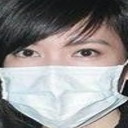

In [21]:
X[0]

In [22]:
type(X)

numpy.ndarray

In [23]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
X

array([[[[ 75,  76,  78],
         [ 67,  68,  70],
         [ 61,  62,  64],
         ...,
         [ 42,  47,  47],
         [ 46,  50,  51],
         [ 52,  56,  57]],

        [[ 78,  80,  82],
         [ 77,  79,  80],
         [ 69,  71,  73],
         ...,
         [ 55,  59,  60],
         [ 55,  59,  60],
         [ 59,  63,  64]],

        [[ 89,  93,  94],
         [ 71,  75,  76],
         [ 53,  57,  58],
         ...,
         [ 55,  60,  60],
         [ 64,  68,  69],
         [ 71,  75,  76]],

        ...,

        [[ 82,  87,  87],
         [ 81,  86,  86],
         [ 65,  69,  69],
         ...,
         [ 34,  34,  42],
         [ 39,  39,  47],
         [ 31,  31,  39]],

        [[ 74,  77,  79],
         [ 70,  74,  75],
         [ 58,  62,  63],
         ...,
         [ 34,  34,  42],
         [ 39,  39,  47],
         [ 31,  31,  39]],

        [[ 75,  79,  80],
         [ 66,  70,  71],
         [ 55,  59,  60],
         ...,
         [ 32,  32,  40],
        

In [26]:
# Assuming you have a list of labels that corresponds to your images
# Example: labels could be [1, 0, 1, ...] for masked/unmasked images
labels = [0] * len(with_mask_images) + [1] * len(without_mask_images)  # Assuming 0 for masked and 1 for unmasked

# Combine your image data and labels
X = np.array(with_mask_images + without_mask_images)  # Combine the images
Y = np.array(labels)  # Corresponding labels

# Check lengths again
print("Length of X:", len(X))
print("Length of Y:", len(Y))

# Now split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Length of X: 33
Length of Y: 33


In [29]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (26, 128, 128, 3)
Shape of Y_train is: (26,)

Shape of X_test is: (7, 128, 128, 3)
Shape of Y_test is: (7,)


In [30]:
#scaling the data
X_train = X_train/255
X_test = X_test/255

In [58]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adamax

# image_size = (128,128)
# channels = 3
# image_shape = (image_size[0],image_size[1], channels)

# base_model = tf.keras.applications.ResNet152V2(
#     include_top=False,
#     weights="imagenet",
#      input_shape=image_shape)

# base_model.trainable = False

# # Create the model
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),  # Use Global Average Pooling instead of Flatten
#     BatchNormalization(),
#     Dense(256, activation='relu'),
#     Dropout(rate=0.2),
#     Dense(2, activation='softmax')  # Use softmax for multi-class classification
#])

In [36]:
model.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D

image_size = (128, 128)
channels = 3
image_shape = (image_size[0], image_size[1], channels)

# Load the base model
base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=image_shape
)

# Set base model to be non-trainable
base_model.trainable = False

# Create the functional model
inputs = Input(shape=image_shape)
x = base_model(inputs, training=False)  # Ensure base model is not trainable
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.2)(x)
outputs = Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet152v2 (Functional)             │ (None, 4, 4, 2048)          │      58,331,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,856,706 (224.52 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [42]:
model.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step - accuracy: 0.5652 - loss: 1.4688 - val_accuracy: 1.0000 - val_loss: 0.0817
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9130 - loss: 0.3183 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9565 - loss: 0.1894 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0359 - val_accuracy: 1.0000 - val_loss: 7.5077e-04
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 3.4605e-04
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 4.0379e-04
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 7.4843e-04
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.001

In [44]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 4.4956e-05
Test Accuracy = 1.0


In [45]:
#Classification Report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



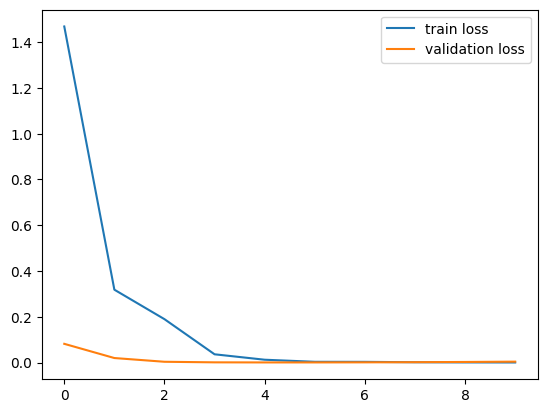

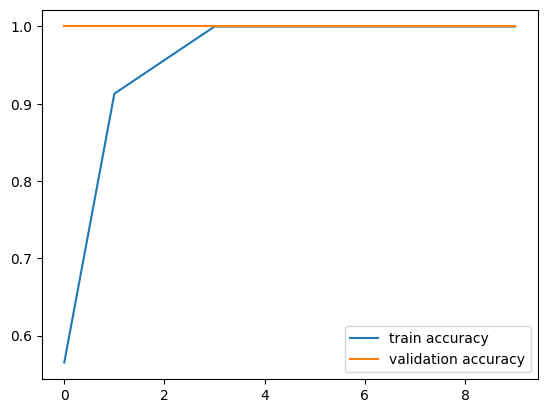

In [46]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

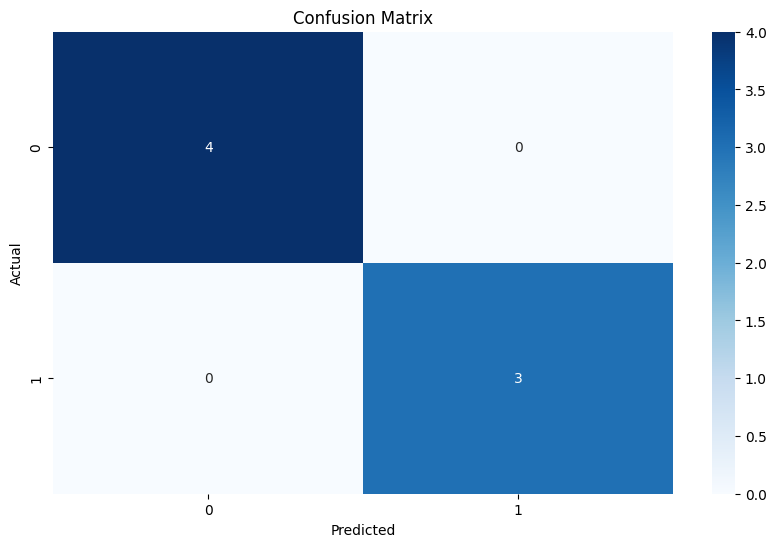

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

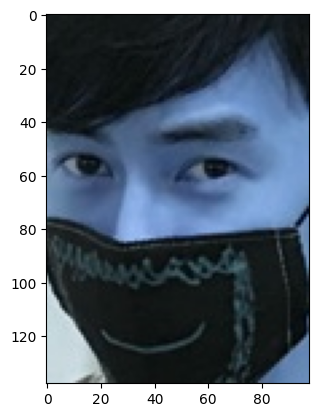

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
[[9.9991381e-01 8.6220476e-05]]


In [55]:
input_image_path = '/content/sample_data/Data/masked/with_mask_8.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

In [56]:
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

0
The person in the image is wearing a mask
